In [1]:
import glob
import pandas as pd
import os

# Define the folder path
folder = "Desktop/car_insurance/Car_Insurance_Claim.csv"
df = pd.read_csv(folder)

In [2]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
df.isnull().sum()


ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [4]:
df.VEHICLE_TYPE.unique()

array(['sedan', 'sports car'], dtype=object)

In [6]:
df.dtypes


ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [7]:
df[['OUTCOME']].astype('int64')

,OUTCOME
0,0
1,1
2,0
3,0
4,1
...,...
9995,0
9996,0
9997,0
9998,1


Text(0.5, 1.0, 'Education Level of Customers')

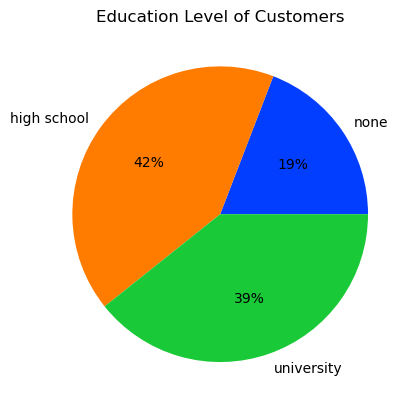

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette('bright')
labels = ['none','high school','university']
a = df[df.EDUCATION == 'none'].shape[0]
b = df[df.EDUCATION == 'high school'].shape[0]
c = df[df.EDUCATION == 'university'].shape[0]
data = [a,b,c]
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.title("Education Level of Customers")

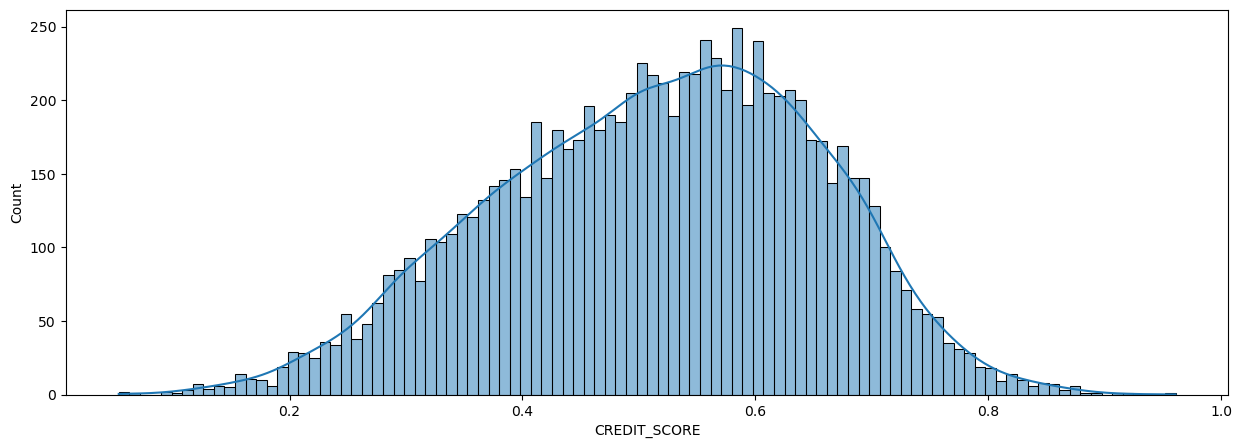

In [11]:
plt.figure(figsize = (15,5))
sns.histplot(data=df['CREDIT_SCORE'],bins=100, kde=True);

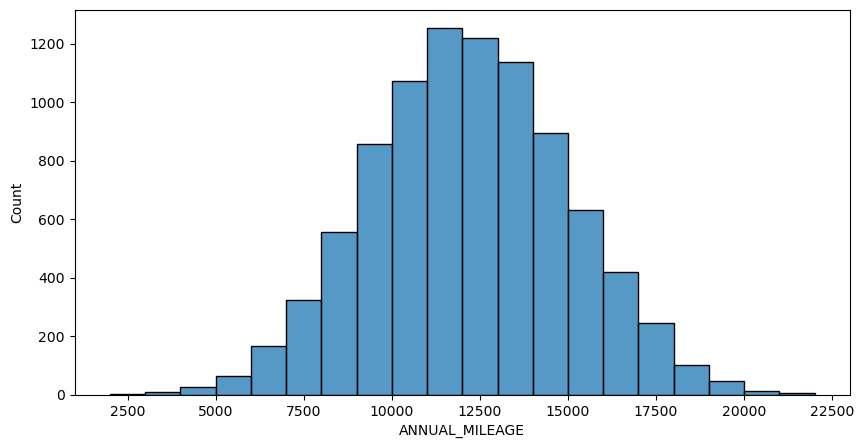

In [12]:
plt.figure(figsize = (10,5))
sns.histplot(data=df['ANNUAL_MILEAGE'],bins=20);

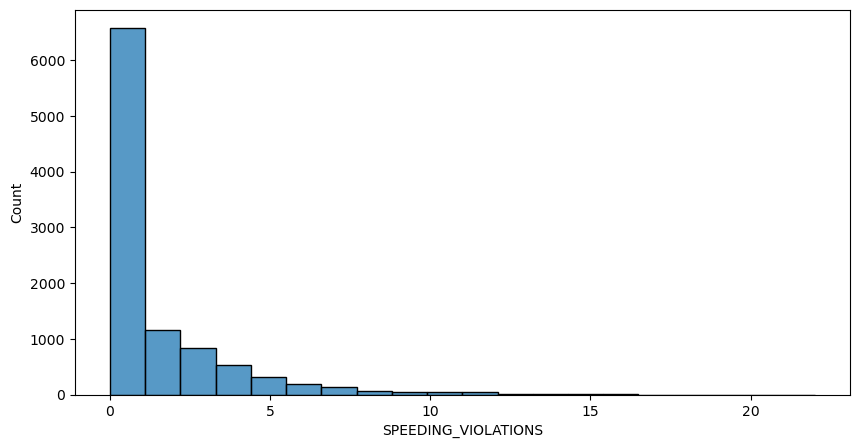

In [14]:
plt.figure(figsize = (10,5))
sns.histplot(data=df['SPEEDING_VIOLATIONS'],bins=20);

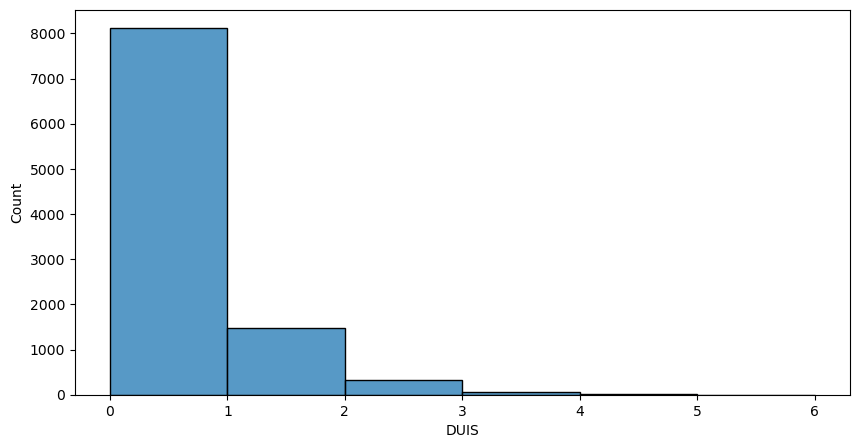

In [15]:
plt.figure(figsize = (10,5))
sns.histplot(data=df['DUIS'],bins=6);

Data preprocessing

In [16]:
df.replace("female",0,inplace=True)
df.replace("male",1,inplace=True)
df.replace("minority",0,inplace=True)
df.replace("majority",1,inplace=True)
df.replace('16-25',0,inplace=True)
df.replace('26-39',1,inplace=True)
df.replace('40-64',2,inplace=True)
df.replace('65+',3,inplace=True)

df.replace('0-9y',0,inplace=True)
df.replace('10-19y',1,inplace=True)
df.replace('20-29y',2,inplace=True)
df.replace('30y+',3,inplace=True)

df.replace('none',0,inplace=True)
df.replace('high school',1,inplace=True)
df.replace('university',2,inplace=True)

df.replace('poverty',0,inplace=True)
df.replace('working class',1,inplace=True)
df.replace('middle class',2,inplace=True)
df.replace('upper class',3,inplace=True)

df.replace('sedan',0,inplace=True)
df.replace('sports car',1,inplace=True)

df.replace('before 2015',0,inplace=True)
df.replace('after 2015',1,inplace=True)
df.tail(12)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9988,479789,1,1,1,1,1,0,NaN,0.0,0,0.0,0.0,10238,NaN,0,1,0,2,1.0
9989,801998,2,1,1,2,1,2,0.678696,1.0,0,1.0,1.0,32765,7000.0,0,9,0,0,0.0
9990,302403,0,0,1,0,1,1,0.502120,1.0,0,0.0,1.0,32765,10000.0,0,0,0,0,1.0
9991,67445,1,1,1,1,2,3,0.705228,1.0,1,0.0,0.0,10238,15000.0,0,0,0,1,0.0
9992,188300,3,1,1,1,2,3,0.542105,1.0,0,1.0,1.0,10238,8000.0,0,0,0,2,0.0
9993,156495,1,1,1,1,2,3,0.695466,1.0,0,0.0,1.0,10238,11000.0,0,4,1,0,0.0
9994,752887,1,1,1,1,1,2,0.454300,1.0,0,0.0,0.0,10238,16000.0,0,1,0,2,0.0
9995,323164,1,0,1,1,2,3,0.582787,1.0,0,0.0,0.0,10238,16000.0,0,0,0,1,0.0
9996,910346,1,0,1,1,0,2,0.522231,1.0,1,0.0,1.0,32765,NaN,0,1,0,0,0.0
9997,468409,1,1,1,0,1,2,0.470940,1.0,0,0.0,1.0,10238,14000.0,0,0,0,0,0.0


Text(0.5, 1.0, 'Factors Rank')

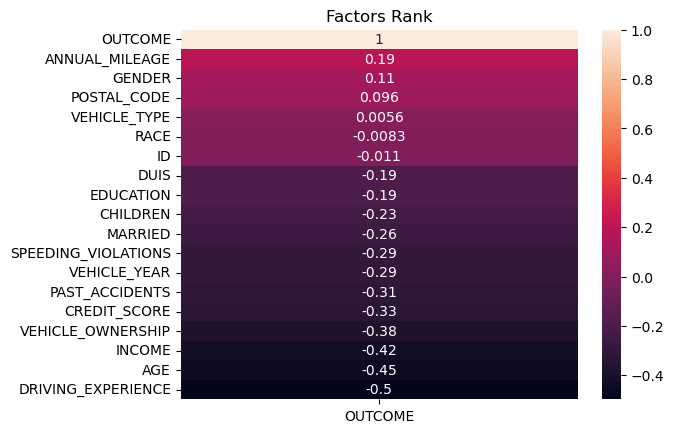

In [17]:
sns.heatmap(df.corr()[['OUTCOME']].sort_values(by='OUTCOME', ascending=False), annot = True)
plt.title('Factors Rank')

We find that there are multiple factors that are negatively correlated with whether or not to issue a policy. The longer you drive, the older you are, the higher your income, the higher your credit, have a car in your name, and those who have been in traffic accidents, the less likely you are to take out a policy .


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix
df.isna().sum()
df.dropna(axis=0, how='any',inplace=True)

In [37]:
y= df['OUTCOME']
X =df.drop(columns=['OUTCOME'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
preprocess_pip = make_pipeline(StandardScaler(), PCA(n_components=.9))
preprocess_pip.fit(X_train)
X_train_prep = preprocess_pip.transform(X_train)
X_test_prep = preprocess_pip.transform(X_test)

In [39]:
X_train_prep.shape

(6519, 13)

In [40]:
X_test_prep.shape

(1630, 13)

In [41]:
df.shape

(8149, 19)

In [42]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
nn_model_1 = Sequential()
nn_model_1.add(Dense(X_test_prep.shape[1] + 1, input_dim=X_test_prep.shape[1], activation='relu'))
nn_model_1.add(Dense(1, activation='sigmoid')) 

In [46]:
from keras.metrics import Accuracy, AUC
nn_model_1.compile(
    loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
    optimizer='adam',
    metrics=[Accuracy(), AUC()]  # Metrics for classification
)

In [48]:
insurance= nn_model_1.fit(
    X_train_prep, y_train,
    validation_data=(X_test_prep, y_test),
    epochs=100
)

Epoch 1/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.0000e+00 - auc: 0.9060 - val_loss: 0.3792 - val_accuracy: 0.0000e+00 - val_auc: 0.8936
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.0000e+00 - auc: 0.9066 - val_loss: 0.3778 - val_accuracy: 0.0000e+00 - val_auc: 0.8942
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.0000e+00 - auc: 0.9068 - val_loss: 0.3767 - val_accuracy: 0.0000e+00 - val_auc: 0.8950
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.0000e+00 - auc: 0.9074 - val_loss: 0.3763 - val_accuracy: 0.0000e+00 - val_auc: 0.8951
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.0000e+00 - auc: 0.9079 - val_loss: 0.3758 - val_accuracy: 0.0000e+00 - val_auc: 0.8956
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 0.3491 - a

In [52]:
'''
Functions to Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()
# You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()
import tensorflow as tf
tf.config.run_functions_eagerly(True)

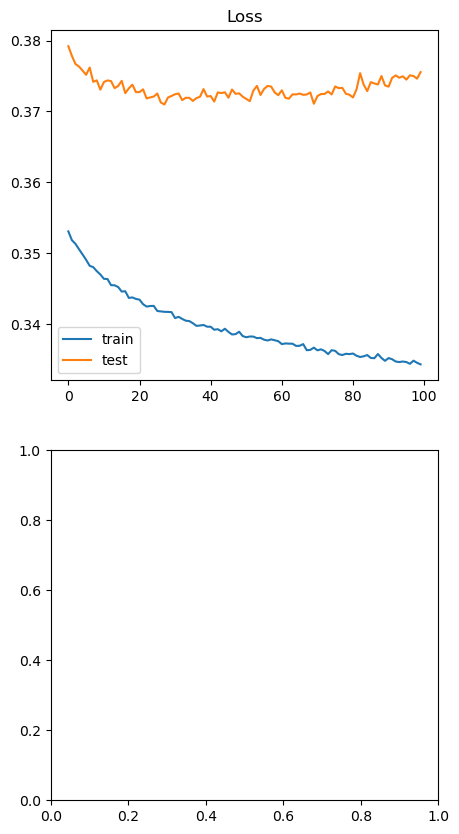

In [55]:
# Plot training history
plot_history(insurance)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import Accuracy, AUC
# Define the model
nn_model_2 = Sequential()
nn_model_2.add(Dense(X_test_prep.shape[1] + 16, input_dim=X_test_prep.shape[1], activation='relu'))
nn_model_2.add(BatchNormalization())
nn_model_2.add(Dropout(0.5))  # Dropout layer with 50% rate to prevent overfitting
nn_model_2.add(Dense(64, activation='relu'))
nn_model_2.add(Dropout(0.5))
nn_model_2.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model with tuned parameters
optimizer = Adam(learning_rate=0.001)  # Tuned learning rate
nn_model_2.compile(
    loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
    optimizer=optimizer,
    metrics=[Accuracy(), AUC()]  # Metrics for classification
)
insurance= nn_model_2.fit(
    X_train_prep, y_train,
    validation_data=(X_test_prep, y_test),
    epochs=100
)
# Model summary
nn_model_2.summary()

Epoch 1/100


C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


204/204 [==============================] - 10s 48ms/step - loss: 0.7235 - accuracy: 0.0000e+00 - auc_2: 0.6840 - val_loss: 0.4402 - val_accuracy: 0.0000e+00 - val_auc_2: 0.8612
Epoch 2/100
204/204 [==============================] - 11s 52ms/step - loss: 0.4870 - accuracy: 0.0000e+00 - auc_2: 0.8134 - val_loss: 0.4071 - val_accuracy: 0.0000e+00 - val_auc_2: 0.8763
Epoch 3/100
204/204 [==============================] - 10s 48ms/step - loss: 0.4572 - accuracy: 0.0000e+00 - auc_2: 0.8391 - val_loss: 0.4004 - val_accuracy: 0.0000e+00 - val_auc_2: 0.8824
Epoch 4/100
204/204 [==============================] - 10s 50ms/step - loss: 0.4378 - accuracy: 0.0000e+00 - auc_2: 0.8549 - val_loss: 0.3960 - val_accuracy: 0.0000e+00 - val_auc_2: 0.8851
Epoch 5/100
204/204 [==============================] - 10s 48ms/step - loss: 0.4259 - accuracy: 0.0000e+00 - auc_2: 0.8622 - val_loss: 0.3912 - val_accuracy: 0.0000e+00 - val_auc_2: 0.8886
Epoch 6/100
204/204 [==============================] - 10s 47ms/ste

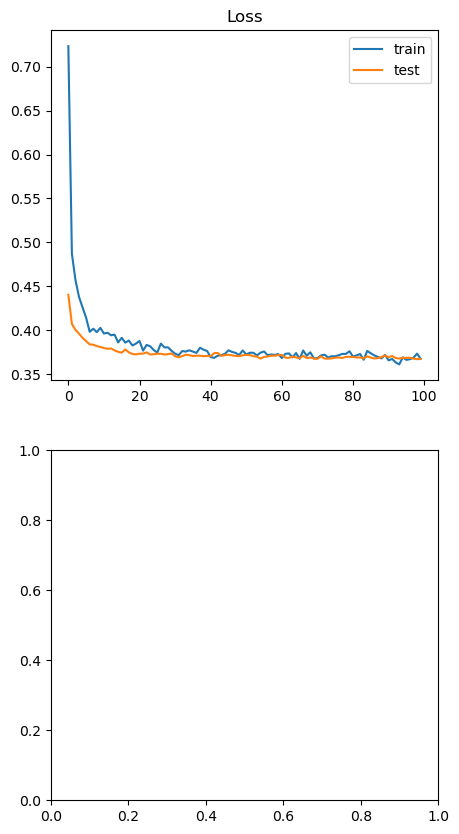

In [60]:
plot_history(insurance)

In [61]:
X_kmeans = df[df.columns]
X_kmeans

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,3,0,1,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,0,1,1,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,0,0,1,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,0,1,1,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,1,1,1,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,752887,1,1,1,1,1,2,0.454300,1.0,0,0.0,0.0,10238,16000.0,0,1,0,2,0.0
9995,323164,1,0,1,1,2,3,0.582787,1.0,0,0.0,0.0,10238,16000.0,0,0,0,1,0.0
9997,468409,1,1,1,0,1,2,0.470940,1.0,0,0.0,1.0,10238,14000.0,0,0,0,0,0.0
9998,903459,1,0,1,1,1,0,0.364185,0.0,0,0.0,1.0,10238,13000.0,0,2,0,1,1.0


In [62]:
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)
X_kmeans_scaled

array([[ 0.23442562,  1.4636193 , -0.99767114, ..., -0.43196423,
        -0.6397574 , -0.67216687],
       [ 0.85622824, -1.46326012,  1.0023343 , ..., -0.43196423,
        -0.6397574 ,  1.48772581],
       [-1.03644204, -1.46326012, -0.99767114, ..., -0.43196423,
        -0.6397574 , -0.67216687],
       ...,
       [-0.11322615, -0.48763365,  1.0023343 , ..., -0.43196423,
        -0.6397574 , -0.67216687],
       [ 1.3826141 , -0.48763365, -0.99767114, ..., -0.43196423,
        -0.03934475,  1.48772581],
       [-0.20163562, -0.48763365, -0.99767114, ..., -0.43196423,
        -0.6397574 , -0.67216687]])

C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

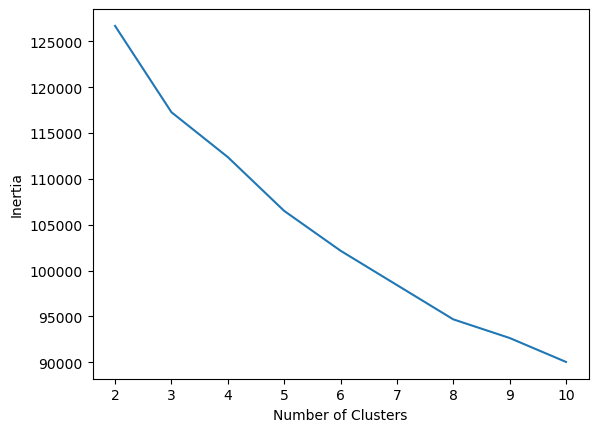

In [63]:
ks = range(2,11)
inertia = []

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X_kmeans_scaled)
  inertia.append(model.inertia_)

 # plot number of cluster and inertia

plt.plot(ks, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

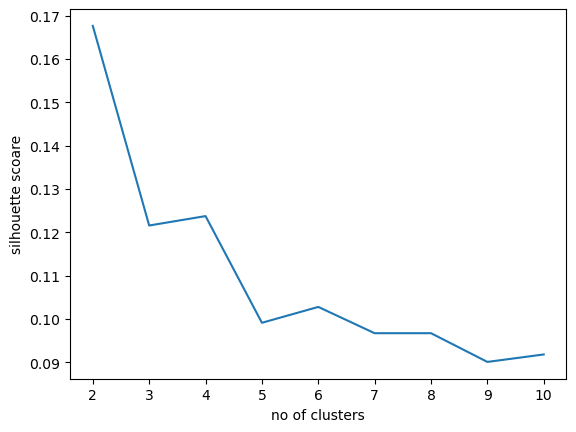

In [64]:
# define a range of values of k to evaluate for silhouette score, fit and run the model, and plot the results
ks =range(2,11)
sil =[]

for k in ks:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(X_kmeans_scaled)
  sil.append(silhouette_score(X_kmeans_scaled, model.labels_))

 # plot no of cluster and inertia

plt.plot(ks, sil)
plt.xlabel('no of clusters')
plt.ylabel('silhouette scoare')
plt.show()

In [71]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_kmeans_scaled)
df['cluster'] = km.predict(X_kmeans_scaled)

C:\Users\asus\anaconda3\envs\dojo-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
X_kmeans_scaled

array([[ 0.23442562,  1.4636193 , -0.99767114, ..., -0.43196423,
        -0.6397574 , -0.67216687],
       [ 0.85622824, -1.46326012,  1.0023343 , ..., -0.43196423,
        -0.6397574 ,  1.48772581],
       [-1.03644204, -1.46326012, -0.99767114, ..., -0.43196423,
        -0.6397574 , -0.67216687],
       ...,
       [-0.11322615, -0.48763365,  1.0023343 , ..., -0.43196423,
        -0.6397574 , -0.67216687],
       [ 1.3826141 , -0.48763365, -0.99767114, ..., -0.43196423,
        -0.03934475,  1.48772581],
       [-0.20163562, -0.48763365, -0.99767114, ..., -0.43196423,
        -0.6397574 , -0.67216687]])

In [73]:

df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,cluster
0,569520,3,0,1,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0,1
1,750365,0,1,1,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0,0
2,199901,0,0,1,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0,0
3,478866,0,1,1,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0,0
4,731664,1,1,1,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0,0


In [74]:
df.groupby(['cluster']).agg({
    'DRIVING_EXPERIENCE': ['count', 'min', 'max', 'median', 'mean'],
    'INCOME': ['min', 'max', 'median', 'mean'],
    'ANNUAL_MILEAGE': ['min', 'max', 'median', 'mean'],
    'VEHICLE_OWNERSHIP': ['mean'],
    
})

DRIVING_EXPERIENCE                          INCOME             \
                     count min max median      mean    min max median   
cluster                                                                 
0                     3608   0   3    0.0  0.418237      0   3    1.0   
1                     4541   0   3    2.0  1.600088      0   3    3.0   

                  ANNUAL_MILEAGE                                  \
             mean            min      max   median          mean   
cluster                                                            
0        0.945399         3000.0  22000.0  13000.0  12871.119734   
1        2.682669         2000.0  20000.0  11000.0  10757.762607   

        VEHICLE_OWNERSHIP  
                     mean  
cluster                    
0                0.501663  
1                0.856199

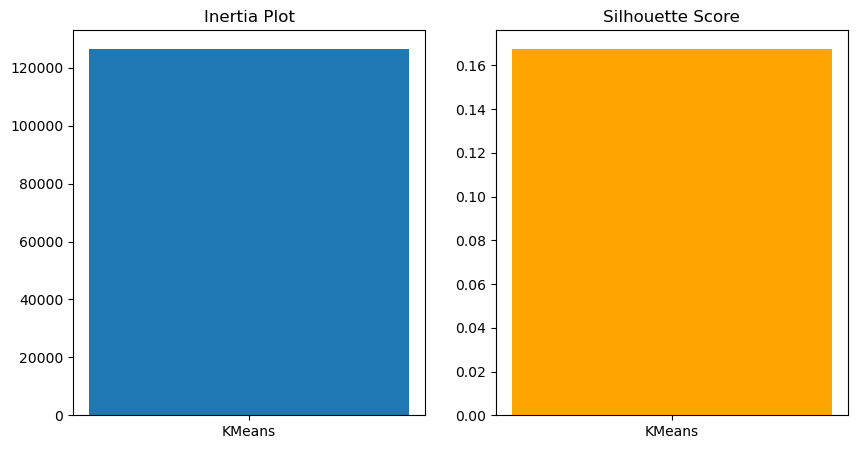

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_avg = silhouette_score(X_kmeans_scaled, df['cluster'])

# Plot inertia
plt.figure(figsize=(10, 5))

# Plot Inertia
plt.subplot(1, 2, 1)
plt.title('Inertia Plot')
plt.bar(range(1), [inertia])
plt.xticks(range(1), ['KMeans'])

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.title('Silhouette Score')
plt.bar(range(1), [silhouette_avg], color='orange')
plt.xticks(range(1), ['KMeans'])

plt.show()